In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 
import string 
%matplotlib inline

In [2]:
Log = pd.read_csv('Log.csv')
Log.head()

,Дата,Время,ID Пользователя,Страница,Действие,Код результата
0,2019-03-01,2019-03-01 05:06:04,16fa8c9c-83af-4d28-b4e6-39696083f2e6,Главная,Загрузить,ok
1,2019-03-01,2019-03-01 05:06:54,a5c7d2a0-2a3e-406d-a682-4a2f46aaaff7,Главная,Загрузить,ok
2,2019-03-01,2019-03-01 05:07:12,16fa8c9c-83af-4d28-b4e6-39696083f2e6,Редактор,Закрыть,ok
3,2019-03-01,2019-03-01 05:07:13,16fa8c9c-83af-4d28-b4e6-39696083f2e6,Главная,Загрузить,ok
4,2019-03-01,2019-03-01 05:08:30,a5c7d2a0-2a3e-406d-a682-4a2f46aaaff7,Редактор,Закрыть,ok


In [3]:
Log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326875 entries, 0 to 326874
Data columns (total 6 columns):
Дата               326875 non-null object
Время              326875 non-null object
ID Пользователя    326875 non-null object
Страница           326875 non-null object
Действие           326875 non-null object
Код результата     326875 non-null object
dtypes: object(6)
memory usage: 15.0+ MB


In [5]:
Log.describe()

,Дата,Время,ID Пользователя,Страница,Действие,Код результата
count,326875,326875,326875,326875,326875,326875
unique,91,320120,340,4,5,2
top,2019-03-03,2019-05-23 22:33:58,f801398f-11c7-44a8-a61d-b2b2635c9231,Главная,Закрыть,ok
freq,7306,3,5007,147632,113352,318211


In [3]:
Log['Страница'].value_counts()

Главная          147632
Редактор          98915
Файл принят       74689
Файл отклонён      5639
Name: Страница, dtype: int64

In [4]:
Log['Действие'].value_counts()

Закрыть                              113352
Посмотреть результат приёма           81254
Загрузить                             66378
Отправить                             32981
<Пользователь редактировал текст>     32910
Name: Действие, dtype: int64

In [5]:
Log['Код результата'].value_counts()

ok      318211
fail      8664
Name: Код результата, dtype: int64

In [6]:
Log['Дата'].min()

'2019-03-01'

In [7]:
Log['Дата'].max()

'2019-05-30'

In [11]:
Log['ID Пользователя'].nunique()

340

In [13]:
Log['Дата'] = pd.to_datetime(Log['Дата']) 

In [16]:
Log['Дата'].dt.dayofweek.value_counts()

6    50914
1    50760
5    46594
0    44879
2    44834
3    44632
4    44262
Name: Дата, dtype: int64

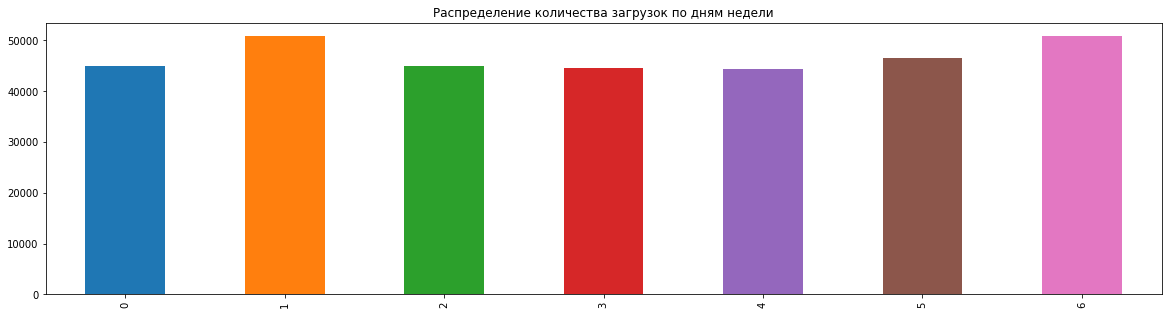

In [17]:
Log['Дата'].dt.dayofweek.value_counts().sort_index().plot(kind="bar", figsize=(20,5), title = 'Распределение количества загрузок по дням недели')

In [15]:
Log['Дата'].dt.day.value_counts()

3     17641
1     14293
2     14034
5     11671
29    11379
19    11184
28    11119
7     11031
9     10975
23    10893
13    10708
11    10606
14    10584
21    10563
17    10447
26    10221
16    10215
27    10174
4     10075
25    10021
6     10005
15     9717
24     9632
30     9613
18     9453
10     9312
8      9215
22     9154
12     9087
20     8974
31     4879
Name: Дата, dtype: int64

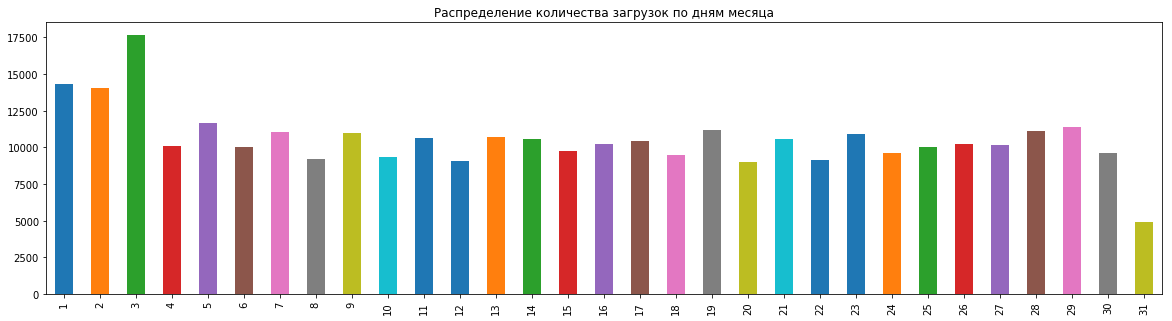

In [18]:
Log['Дата'].dt.day.value_counts().sort_index().plot(kind='bar', figsize=(20,5), title = 'Распределение количества загрузок по дням месяца')

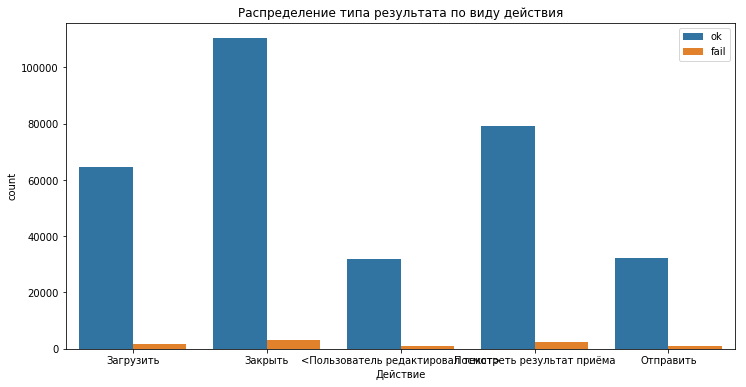

In [19]:
plt.figure (figsize = (12,6))
sns.countplot (data=Log, 
x = 'Действие',
hue = 'Код результата')
plt.title('Распределение типа результата по виду действия')
plt.legend(loc = 'upper right')

In [30]:
Log.groupby(['Действие'])['Код результата'].value_counts()

Действие                           Код результата
<Пользователь редактировал текст>  ok                 32052
                                   fail                 858
Загрузить                          ok                 64614
                                   fail                1764
Закрыть                            ok                110398
                                   fail                2954
Отправить                          ok                 32124
                                   fail                 857
Посмотреть результат приёма        ok                 79023
                                   fail                2231
Name: Код результата, dtype: int64

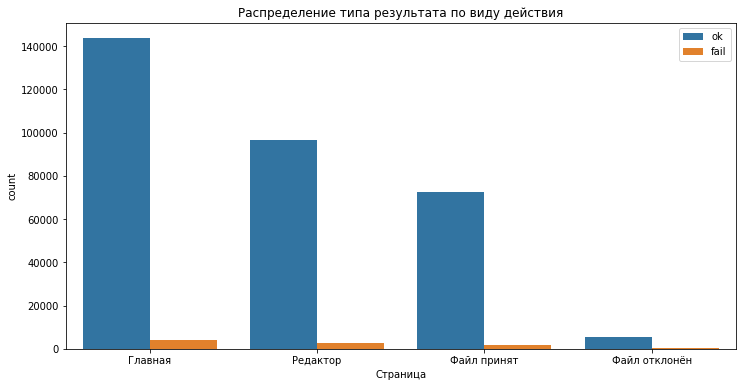

In [24]:
plt.figure (figsize = (12,6))
sns.countplot (data=Log, 
x = 'Страница',
hue = 'Код результата')
plt.title('Распределение типа результата по виду действия')
plt.legend(loc = 'upper right')

In [29]:
Log.groupby(['Страница'])['Код результата'].value_counts()

Страница       Код результата
Главная        ok                143637
               fail                3995
Редактор       ok                 96375
               fail                2540
Файл отклонён  ok                  5463
               fail                 176
Файл принят    ok                 72736
               fail                1953
Name: Код результата, dtype: int64

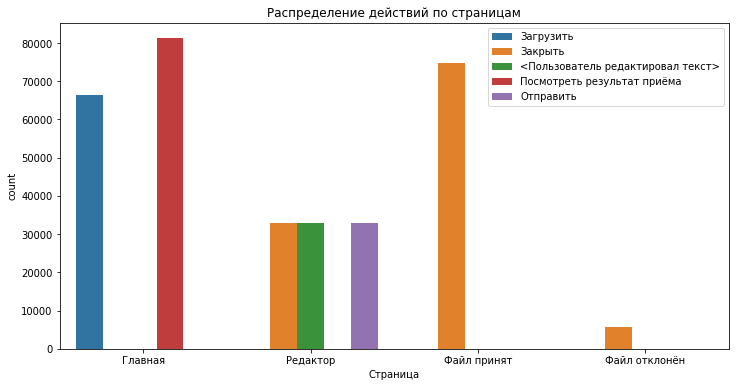

In [17]:
plt.figure (figsize = (12,6))
sns.countplot (data=Log, 
x = 'Страница',
hue = 'Действие')
plt.title('Распределение действий по страницам')
plt.legend(loc = 'upper right')

In [13]:
Log.groupby(['ID Пользователя'])['Действие'].value_counts()

ID Пользователя                       Действие                         
002d4a31-b247-460b-90c5-a50198d8c593  Закрыть                               114
                                      Посмотреть результат приёма            90
                                      Загрузить                              63
                                      Отправить                              35
                                      <Пользователь редактировал текст>      27
0061e9bd-2959-4cc1-b159-507a98f5ae16  Загрузить                               6
                                      Закрыть                                 6
                                      <Пользователь редактировал текст>       4
                                      Посмотреть результат приёма             3
                                      Отправить                               2
011bd0a9-61ff-4d3d-b882-322e3567848e  Закрыть                               155
                                      Посмотреть

In [15]:
Log_P = Log[Log['Действие'] =='Посмотреть результат приёма']

In [16]:
Log_P['ID Пользователя'].nunique()

340

In [47]:
ooo = Log_P.groupby(['ID Пользователя'])['Действие'].count()
ooo.sort_values(ascending = False)

ID Пользователя
f801398f-11c7-44a8-a61d-b2b2635c9231    1270
b4beb650-e64f-422e-a946-96610add7b08    1212
5cce636c-0c6c-4422-b52b-b21c4f8768e9    1186
2ab0b9f5-2563-4244-a427-8e3d3946ddbb    1184
42ff4996-c7d5-4690-a972-58425a7ee6c3    1183
eddc7163-f6ed-4ee1-83f8-b39417efbf9c    1175
3368e933-073c-4311-a0e0-11d38ce616f0    1166
2ec12a60-ed26-4c33-a03d-2bb4aa6f5786    1165
50920542-6da4-4120-95aa-3728a6fdf739    1163
b8e8e6b3-ba2c-45c8-b22e-674200e55880    1163
5fe57dbd-b0aa-411e-ae2a-67c80acfe1ac    1157
e45a8138-12c2-42dd-94dc-a57959aaddac    1152
62a49e42-4de2-4c11-8e25-8b3ff87af9c0    1151
9875c540-925a-4510-ae87-cf504b8b315d    1148
622dba9e-b0db-43be-a4c2-607e8e5e2ced    1147
60a7c940-d5cf-473d-9d05-ff53d2b4ff8a    1141
e7f4d64a-dfff-4803-81ef-d1b174ebd421    1138
dff0d85f-08bf-4457-8257-db11e07eb764    1136
9319970b-d60b-404d-adff-cc7d0a58b9bd    1135
e5761340-bb4c-4817-851c-b722ab7833aa    1134
14d1d6ca-2f6c-44cb-a2e2-b77545cc4c11    1133
51bd28ac-2a1a-4006-a56f-917eb7d5c1fa   

In [49]:
ooo.median()

69.5